In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint # 모델에 모니터 할 값을 설정하고 저장
from tensorflow.keras.callbacks import EarlyStopping # xㅔ스트 셋 오차가 줄지않으면 학습을 멈추게 함

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.model_selection import StratifiedKFold

import os


df_pre = pd.read_csv('../../../../../dlevery/dataset/wine.csv', header = None)

df = df_pre.sample(frac = 1)

print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 169 to 6401
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
       0      1     2     3      4     5      6        7     8     9     10  \
169   7.5  0.705  0.24  1.80  0.360  15.0   63.0  0.99640  3.00  1.59   9.5   
1045  6.9  0.440  0.00  1.40  0.070  32.0   38.0  0.99438  3.32  0.58  11.4   
5178  7.4  0.250  0.28  7.25  0.028  14.0

In [8]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
           optimizer='adam',
           metrics=['accuracy'])

# 자동 중단 설정
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

# 모델 실행
# model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])



model.fit(X, Y, epochs = 200, batch_size = 200)

# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
33/33 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.7654
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.9070
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9244
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9264
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2176 - accuracy: 0.9289
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9289
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.2065 - accuracy: 0.9310
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1969 - accuracy: 0.9349
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9346
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9358
Epoch 11/

In [14]:
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1) # 그냥 다 저장

checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True) # loss가 기존보다 작은애만 저장

model.fit(X, Y, validation_split = 0.2, epochs = 200, batch_size = 200, verbose = 0, callbacks = [checkpointer])


Epoch 00001: val_loss improved from inf to 0.04294, saving model to ./model/01-0.0429.hdf5

Epoch 00002: val_loss improved from 0.04294 to 0.03896, saving model to ./model/02-0.0390.hdf5

Epoch 00003: val_loss did not improve from 0.03896

Epoch 00004: val_loss did not improve from 0.03896

Epoch 00005: val_loss did not improve from 0.03896

Epoch 00006: val_loss did not improve from 0.03896

Epoch 00007: val_loss did not improve from 0.03896

Epoch 00008: val_loss did not improve from 0.03896

Epoch 00009: val_loss did not improve from 0.03896

Epoch 00010: val_loss did not improve from 0.03896

Epoch 00011: val_loss did not improve from 0.03896

Epoch 00012: val_loss did not improve from 0.03896

Epoch 00013: val_loss did not improve from 0.03896

Epoch 00014: val_loss did not improve from 0.03896

Epoch 00015: val_loss did not improve from 0.03896

Epoch 00016: val_loss did not improve from 0.03896

Epoch 00017: val_loss did not improve from 0.03896

Epoch 00018: val_loss did not i

In [17]:
df = df_pre.sample(frac = 0.15)

history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, verbose = 1)


Epoch 1/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0112 - accuracy: 0.9954 - val_loss: 0.0534 - val_accuracy: 0.9888
Epoch 2/3500
9/9 [==============================] - 0s 5ms/step - loss: 0.0113 - accuracy: 0.9966 - val_loss: 0.0541 - val_accuracy: 0.9888
Epoch 3/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.9956 - val_loss: 0.0545 - val_accuracy: 0.9902
Epoch 4/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0608 - val_accuracy: 0.9879
Epoch 5/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0532 - val_accuracy: 0.9893
Epoch 6/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0546 - val_accuracy: 0.9893
Epoch 7/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0512 - val_accuracy: 0.9893
Epoch 8/3500
9/9 [==

KeyError: 'acc'

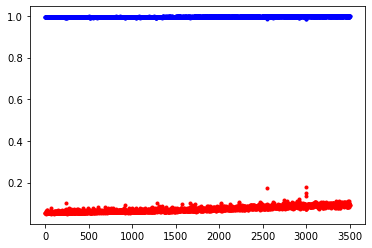

In [19]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize = 3)
plt.plot(x_len, y_acc, "o", c="blue", markersize = 3)

In [21]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience = 100)
model.fit(X, Y, validation_split=0.33, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

Epoch 1/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 0.9977 - val_loss: 0.0915 - val_accuracy: 0.9897
Epoch 2/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.1009 - val_accuracy: 0.9893
Epoch 3/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0081 - accuracy: 0.9970 - val_loss: 0.0981 - val_accuracy: 0.9897
Epoch 4/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.1018 - val_accuracy: 0.9888
Epoch 5/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.9972 - val_loss: 0.1019 - val_accuracy: 0.9911
Epoch 6/2000
9/9 [==============================] - 0s 7ms/step - loss: 0.0062 - accuracy: 0.9975 - val_loss: 0.1016 - val_accuracy: 0.9897
Epoch 7/2000
9/9 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.9979 - val_loss: 0.1004 - val_accuracy: 0.9893
Epoch 8/2000
9/9 [==

In [22]:
# Epoch 204/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.9977 - val_loss: 0.1015 - val_accuracy: 0.9897 # 최종
# Epoch 205/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0058 - accuracy: 0.9975 - val_loss: 0.1018 - val_accuracy: 0.9897
# Epoch 206/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.1024 - val_accuracy: 0.9907
# Epoch 207/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.1047 - val_accuracy: 0.9911
# Epoch 208/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9963 - val_loss: 0.1136 - val_accuracy: 0.9883
# Epoch 209/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.1060 - val_accuracy: 0.9851
# Epoch 210/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9947 - val_loss: 0.1085 - val_accuracy: 0.9883
# Epoch 211/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.9970 - val_loss: 0.1030 - val_accuracy: 0.9888
# Epoch 212/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0890 - val_accuracy: 0.9883
# Epoch 213/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0888 - val_accuracy: 0.9911
# Epoch 214/2000
# 9/9 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9972 - val_loss: 0.0907 - val_accuracy: 0.9907
# Epoch 215/2000
# 9/9 [==============================] - 0s 7ms/step - loss: 0.0061 - accuracy: 0.9975 - val_loss: 0.0947 - val_accuracy: 0.9893 에서 멈춤

print(model.evaluate(X, Y)[1])


204/204 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9949
0.9949207305908203


In [23]:

model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, callbacks=[early_stopping_callback, checkpointer], verbose=0)


Epoch 00001: val_loss did not improve from 0.03414

Epoch 00002: val_loss did not improve from 0.03414

Epoch 00003: val_loss did not improve from 0.03414

Epoch 00004: val_loss did not improve from 0.03414

Epoch 00005: val_loss did not improve from 0.03414

Epoch 00006: val_loss did not improve from 0.03414

Epoch 00007: val_loss did not improve from 0.03414

Epoch 00008: val_loss did not improve from 0.03414

Epoch 00009: val_loss did not improve from 0.03414

Epoch 00010: val_loss did not improve from 0.03414

Epoch 00011: val_loss did not improve from 0.03414

Epoch 00012: val_loss did not improve from 0.03414

Epoch 00013: val_loss did not improve from 0.03414

Epoch 00014: val_loss did not improve from 0.03414

Epoch 00015: val_loss did not improve from 0.03414

Epoch 00016: val_loss did not improve from 0.03414

Epoch 00017: val_loss did not improve from 0.03414

Epoch 00018: val_loss did not improve from 0.03414

Epoch 00019: val_loss did not improve from 0.03414

Epoch 00020